# Forman-Ricci Curvature in Different Applications

In [1]:
#import packages (may need to install igraph with !pip install igraph)
import igraph as ig
from igraph import Graph
import numpy as np
import pandas as pd
import os

Application 1: Social Networks

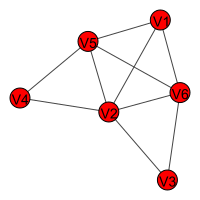

In [8]:
#create graph of towns
soc_net=Graph.TupleList([("V1","V4"),("V2","V4"),("V3","V4"),("V1","V5"),("V3","V5"),("V4","V5"),("V1","V6"),("V2","V6"),("V4","V6"),("V5","V6")])
ig.plot(soc_net,bbox=(200,200),vertex_label=["V1","V2","V3","V4","V5","V6"])

In [9]:
#Forman-Ricci curvature script for soc_net social network
#compute degree centrality
d=Graph.degree(soc_net)

#edge curvature
ecurv=[]
for edge in soc_net.es:
    s=edge.source
    t=edge.target
    ecurv.append(2-d[s]-d[t])

#combine edge curvature by vertex to get vertex curvature
vcurv=[]
for vertex in soc_net.vs:
    inc=Graph.incident(soc_net,vertex)
    inc_curv=[]
    for i in inc:
        inc_curv.append(ecurv[i])
    vcurv.append(sum(inc_curv))

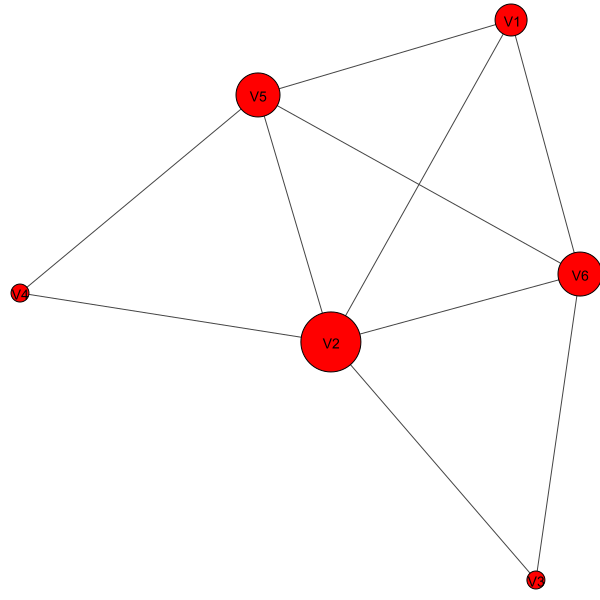

In [13]:
#plot result to examine Forman-Ricci curvature
ig.plot(soc_net,vertex_size=np.array(vcurv)*-2,vertex_label=["V1","V2","V3","V4","V5","V6"])

Application 2: Spatial Data

In [16]:
#import Burkina Faso market millet prices
File="C:/users/njfar/OneDrive/Desktop/BF_Millet.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(File))
mydata=pd.read_csv(os.path.basename(File),encoding='latin1')

In [64]:
#import weight matrix of Burkina Faso markets
File="C:/users/njfar/OneDrive/Desktop/weights_bk.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(File))
weights=pd.read_csv(os.path.basename(File),encoding='latin1')

In [34]:
#grab a time sample across Burkina Faso markets
data=mydata.iloc[0:4,1:46]

Look at curvature without spatial weighting

In [38]:
#find the correlation between markets and threshold (can vary threshold)
cor=np.corrcoef(data.transpose())
cor[cor>=0.5]=1
cor[cor<0.5]=0

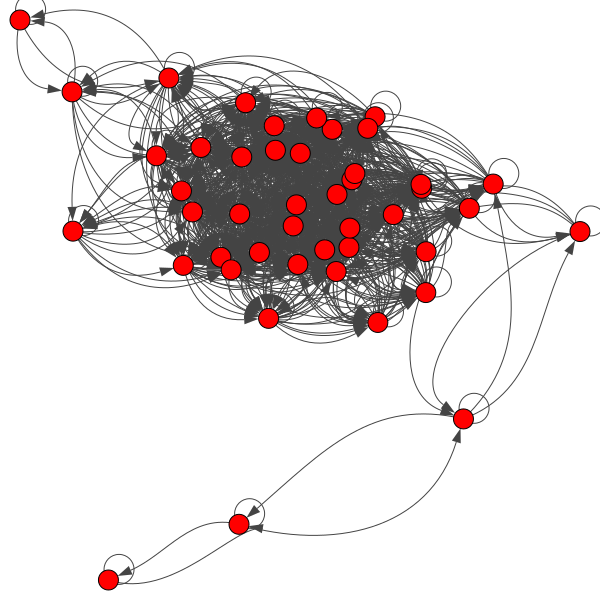

In [39]:
#create graph and plot
bf_market=Graph.Adjacency(cor,diag=False)
ig.plot(bf_market)

In [41]:
#compute curvature
d=Graph.degree(bf_market)
ecurv=[]
for edge in bf_market.es:
    s=edge.source
    t=edge.target
    ecurv.append(2-d[s]-d[t])
vcurv=[]
for vertex in bf_market.vs:
    inc=Graph.incident(bf_market,vertex)
    inc_curv=[]
    for i in inc:
        inc_curv.append(ecurv[i])
    vcurv.append(sum(inc_curv))

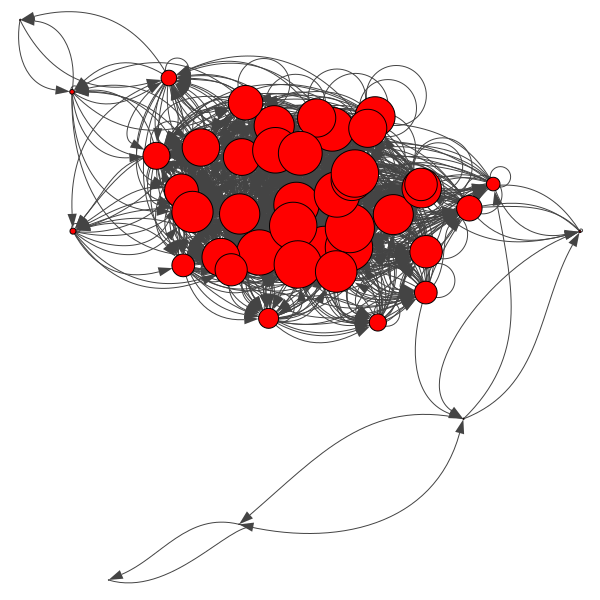

In [45]:
#plot result to examine Forman-Ricci curvature
ig.plot(bf_market,vertex_size=np.array(vcurv)*-0.01)

Look at curvature with spatial weighting

In [65]:
#find the correlation between markets, threshold, and apply spatial weights
cor=np.corrcoef(data.transpose())
weights_total=weights.iloc[:,1:46]
cor[cor>=0.5]=1
cor[cor<0.5]=0
cor_weighted=np.multiply(cor,weights_total)

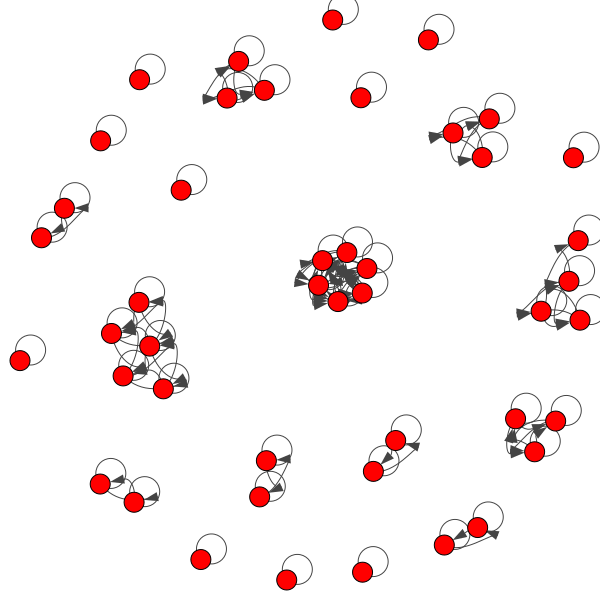

In [67]:
#create graph and plot
bf_market_w=Graph.Adjacency(cor_weighted,diag=False)
ig.plot(bf_market_w)

In [70]:
#compute curvature
d=Graph.degree(bf_market_w)
ecurvw=[]
for edge in bf_market_w.es:
    s=edge.source
    t=edge.target
    ecurvw.append(2-d[s]-d[t])
vcurvw=[]
for vertex in bf_market_w.vs:
    inc=Graph.incident(bf_market_w,vertex)
    inc_curv=[]
    for i in inc:
        inc_curv.append(ecurvw[i])
    vcurvw.append(sum(inc_curv))

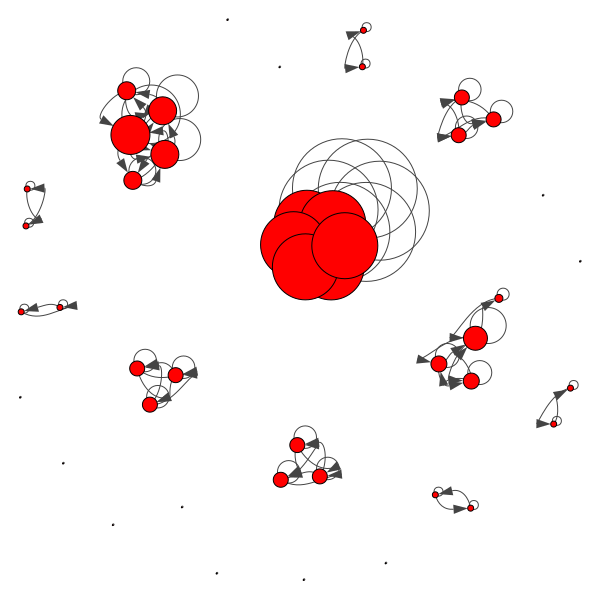

In [75]:
#plot result to examine Forman-Ricci curvature
ig.plot(bf_market_w,vertex_size=np.array(vcurvw)*-0.5)

Application 3: Spatiotemporal Forman-Ricci Analysis of Burkina Faso Market data

In [80]:
#score in yearly sets with 3 quarter overlap
vcurv_t=[]
for Year in range(4,29):
    data=mydata.iloc[(Year-4):(Year),1:46]
    cor=np.corrcoef(data.transpose())
    weights_total=weights.iloc[:,1:46]
    cor[cor>=0.5]=1
    cor[cor<0.5]=0
    cor_weighted=np.multiply(cor,weights_total)
    bf_market_w=Graph.Adjacency(cor_weighted,diag=False)
    d=Graph.degree(bf_market_w)
    ecurvw=[]
    for edge in bf_market_w.es:
        s=edge.source
        t=edge.target
        ecurvw.append(2-d[s]-d[t])
    vcurvw=[]
    for vertex in bf_market_w.vs:
        inc=Graph.incident(bf_market_w,vertex)
        inc_curv=[]
        for i in inc:
            inc_curv.append(ecurvw[i])
        vcurvw.append(sum(inc_curv))
    vcurv_t.append(vcurvw)

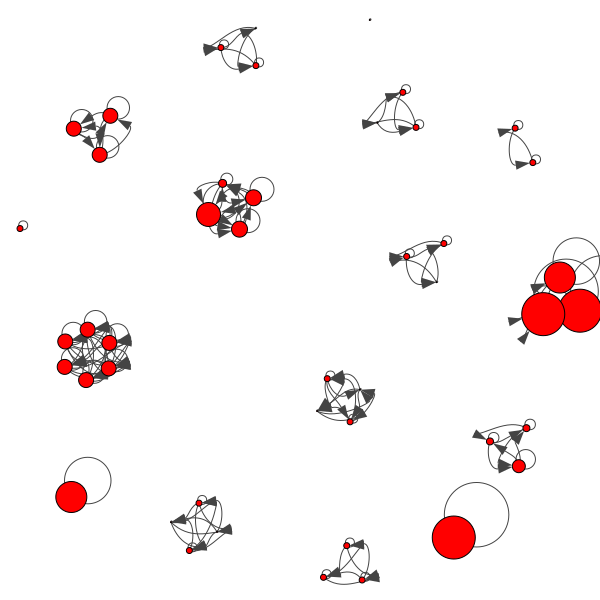

In [83]:
#plot result to examine Forman-Ricci curvature at a time period of interest
ig.plot(bf_market_w,vertex_size=np.array(vcurv_t[4])*-0.5)

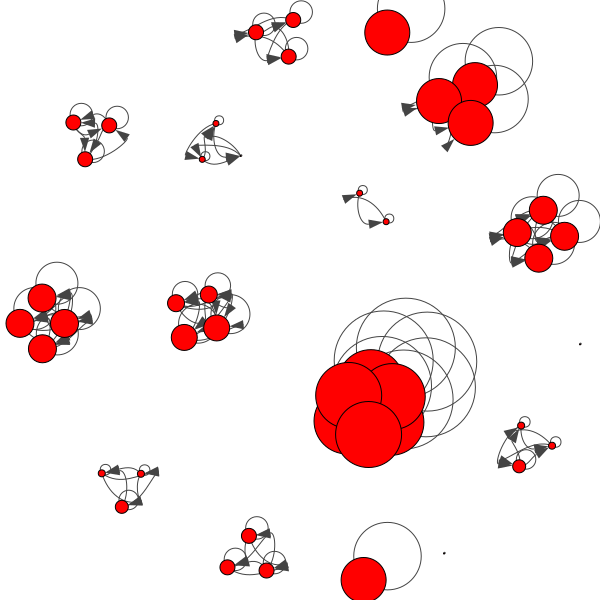

In [84]:
#plot result to examine Forman-Ricci curvature at a time period of interest
ig.plot(bf_market_w,vertex_size=np.array(vcurv_t[5])*-0.5)